In [89]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np


In [4]:
stock=pd.read_csv('/content/stocks.csv')

In [5]:
stock.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


The above data consistes of columns such as:
1.Ticker: stock ticker symbol.
Date: The date on which the trading happens
Open: Opnening stock price.
High: Highest stock price during the day.
Low:  Lowest stock price during the day..
Close: Closing price of the stock for the day.
Adj Close: The adjusted closing price, which accounts for all corporate actions such as dividends, stock splits, etc.
Volume: The number / quamtity of shares traded during the day

**DESCRIPTIVE STATISTICS**


In [18]:
descriptive_statistics=stock.groupby('Ticker')['Close'].describe()


In [19]:
print(descriptive_statistics)

        count        mean        std         min         25%         50%  \
Ticker                                                                     
AAPL     62.0  158.240645   7.360485  145.309998  152.077499  158.055000   
GOOG     62.0  100.631532   6.279464   89.349998   94.702501  102.759998   
MSFT     62.0  275.039839  17.676231  246.270004  258.742500  275.810013   
NFLX     62.0  327.614677  18.554419  292.760010  315.672493  325.600006   

               75%         max  
Ticker                          
AAPL    165.162506  173.570007  
GOOG    105.962503  109.459999  
MSFT    287.217506  310.649994  
NFLX    338.899994  366.829987  


<Axes: title={'center': 'Descriptive Statistics calculation on the stock'}, xlabel='Ticker'>

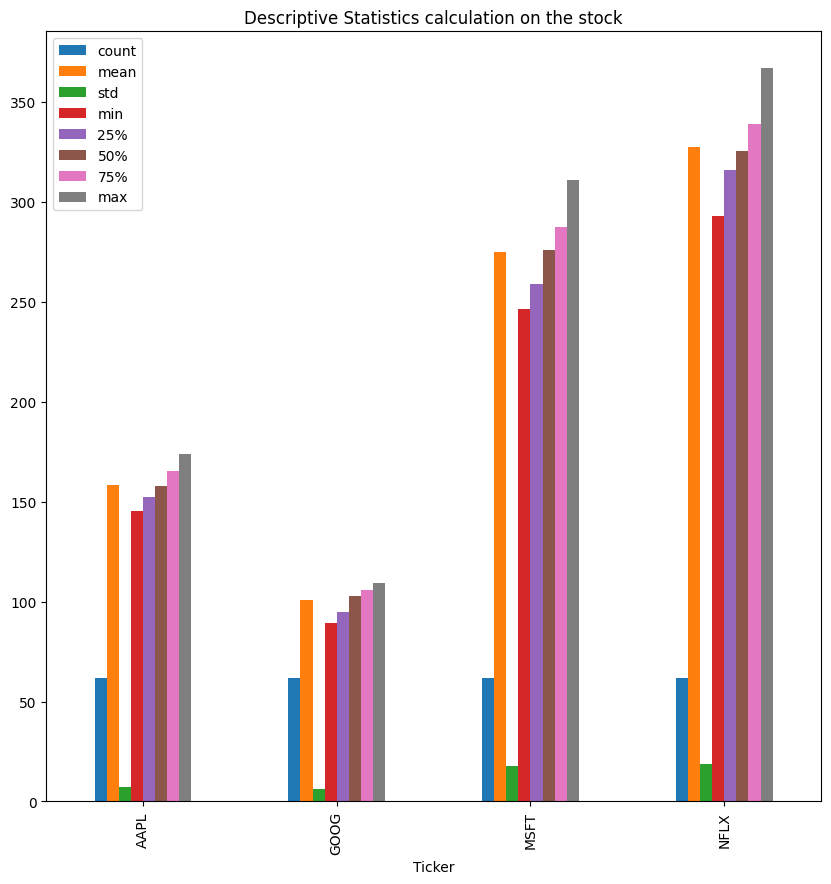

In [29]:
descriptive_statistics.plot(kind='bar',figsize=(10,10),fontsize=10,title='Descriptive Statistics calculation on the stock')

TIME SERIES ANALYSIS

In [34]:
stock['Date'] = pd.to_datetime(stock['Date'])

In [38]:
pivot_data=stock.pivot(index='Date',columns='Ticker',values='Close')

In [90]:
figure=make_subplots(rows=1,cols=1)
for column in pivot_data.columns:
  figure.add_trace(
      go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column,),
      row=1, col=1
  )


In [91]:
 figure.update_layout(
      title_text='Time Series Analysis of Closing Price',
      legend_title='Ticker',
      xaxis_title='Date',
      yaxis_title='Closing Price',
      showlegend=True
)


COORELATION OF STOCK PRICES OF THE COMPANY

In [70]:
correlation_matrix=pivot_data.corr()

In [71]:
print(correlation_matrix)

Ticker      AAPL      GOOG      MSFT      NFLX
Ticker                                        
AAPL    1.000000  0.901662  0.953037  0.154418
GOOG    0.901662  1.000000  0.884527  0.201046
MSFT    0.953037  0.884527  1.000000  0.191273
NFLX    0.154418  0.201046  0.191273  1.000000


In [81]:
hp=go.Figure(data=go.Heatmap(
    z=correlation_matrix,
    y=correlation_matrix.columns,
    x=correlation_matrix.columns,
    colorscale='purples',
    colorbar=dict(title='correlation_values'),
))


In [83]:
hp.update_layout(
    xaxis_title='Ticker',
    yaxis_title='Ticker',
    title='Correlation Matrix'
)